MS FINAL PROJECT: TissueMNIST IMAGE DATA CLASSIFICATION USING RESNET-18 DL MODEL

Name: Anil Vallepu

course: MS in Data Science at TAMUCC,TX, USA.

In [32]:
!pip install tensorflow medmnist

  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [33]:
import numpy as np

In [34]:
import torch
from torchvision import transforms
from medmnist import TissueMNIST
from medmnist import INFO

# Step 1: Get metadata information about the TissueMNIST dataset
dataset_info = INFO['tissuemnist']

# Step 2: Specify the transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

# Step 3: Download and load the TissueMNIST dataset
train_dataset = TissueMNIST(root='./data', split='train', transform=transform, download=True)
test_dataset = TissueMNIST(root='./data', split='test', transform=transform, download=True)

# Step 4: Load the data into DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Step 5: Access a batch of data
for images, labels in train_loader:
    print("Images shape:", images.shape)  # Shape of the images tensor: (batch_size, channels, height, width)
    print("Labels shape:", labels.shape)  # Shape of the labels tensor: (batch_size,)
    break  # Print the shape of one batch and break


Using downloaded and verified file: ./data/tissuemnist.npz
Using downloaded and verified file: ./data/tissuemnist.npz
Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64, 1])


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz


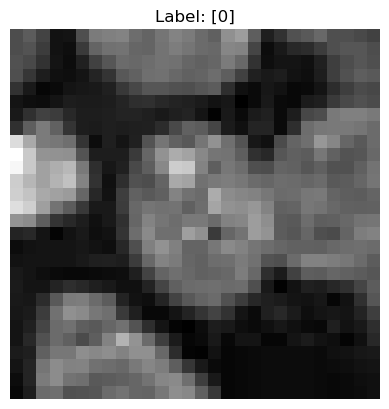

In [14]:
import tensorflow as tf
from medmnist import TissueMNIST
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare the TissueMNIST dataset
dataset = TissueMNIST(split='train', download=True)
X_train = np.array([data[0] for data in dataset])
y_train = np.array([data[1] for data in dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test = np.array([data[0] for data in test_dataset])
y_test = np.array([data[1] for data in test_dataset])

# Normalize the images to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for TensorFlow (batch_size, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Display the first image and its label
image, label = dataset[0]
plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title(f"Label: {label}")
plt.axis('off')  # Hide axis
plt.show()


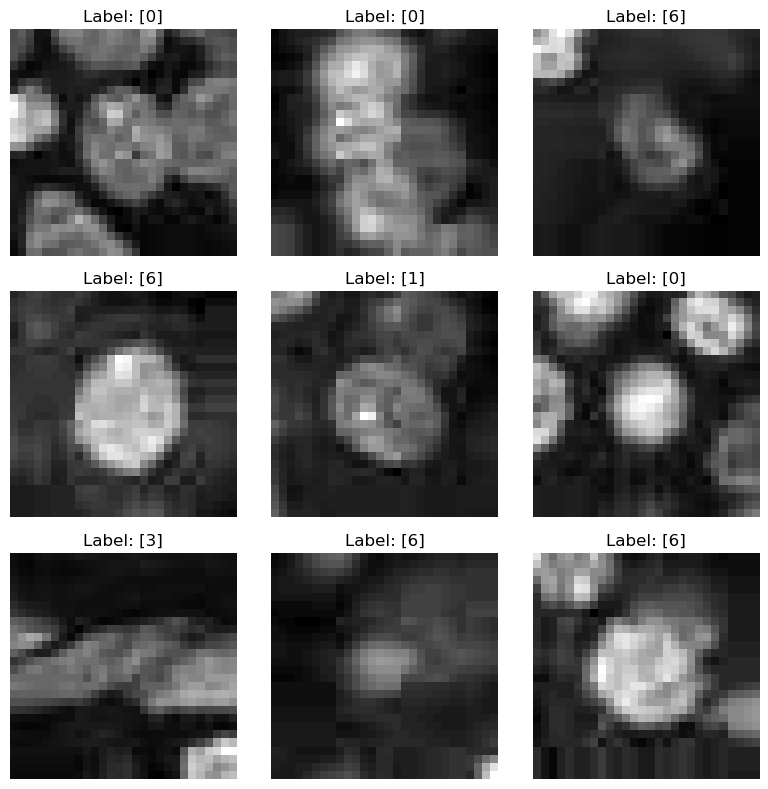

In [15]:
import matplotlib.pyplot as plt

# Displaying first 9 images in datset
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    image, label = dataset[i]  # Get the image and label
    ax.imshow(image, cmap='gray')  # Display image
    ax.set_title(f"Label: {label}")  # Set the label as the title
    ax.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')  # 9 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))


Epoch 1/3
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.5791 - loss: 1.1321 - val_accuracy: 0.5932 - val_loss: 1.0988
Epoch 2/3
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.6048 - loss: 1.0709 - val_accuracy: 0.6071 - val_loss: 1.0707
Epoch 3/3
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.6213 - loss: 1.0267 - val_accuracy: 0.6063 - val_loss: 1.0666


In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


1478/1478 - 2s - 2ms/step - accuracy: 0.6063 - loss: 1.0666
Test accuracy: 0.6063


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)

# Define the CNN model with parameterized activation function
class CNNModel(nn.Module):
    def __init__(self, activation_function='relu'):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Flatten layer output
        self.fc2 = nn.Linear(128, 9)  # 9 output classes
        self.activation_function = activation_function

    def forward(self, x):
        x = self.pool(self._activate(self.conv1(x)))
        x = self.pool(self._activate(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flattening the layer
        x = self._activate(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

    def _activate(self, x):
        if self.activation_function == 'relu':
            return F.relu(x)
        elif self.activation_function == 'sigmoid':
            return torch.sigmoid(x)
        elif self.activation_function == 'tanh':
            return torch.tanh(x)
        else:
            raise ValueError(f"Unknown activation function: {self.activation_function}")

# Function to select loss function
def get_loss_function(loss_function='cross_entropy'):
    if loss_function == 'cross_entropy':
        return nn.CrossEntropyLoss()
    elif loss_function == 'nll_loss':
        return nn.NLLLoss()
    else:
        raise ValueError(f"Unknown loss function: {loss_function}")

# Initialize the model, loss function, and optimizer
activation_function = 'relu'  # Change to 'sigmoid', 'tanh', etc. for experimentation
loss_function = 'cross_entropy'  # Change to 'nll_loss' for experimentation

model = CNNModel(activation_function=activation_function).to(device)  # Move the model to the device
criterion = get_loss_function(loss_function=loss_function)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure both inputs and labels are on the correct device

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")

# Testing loop
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure both inputs and labels are on the correct device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test accuracy: {correct / total:.4f}")

# Train and evaluate the model
train_model(model, train_loader, criterion, optimizer, epochs=5)
evaluate_model(model, test_loader)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 1.3188
Epoch 2, Loss: 1.1657
Epoch 3, Loss: 1.0937
Epoch 4, Loss: 1.0493
Epoch 5, Loss: 1.0120
Test accuracy: 0.6163


Using sigmoid AF:

In [24]:
import tensorflow as tf
from medmnist import TissueMNIST
import numpy as np

# Load dataset
dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in dataset]), np.array([data[1] for data in dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape the data for TensorFlow (batch_size, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels for binary_crossentropy loss
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=9)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=9)

# Define the model with Sigmoid activation function
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(9, activation='sigmoid')  # 9 classes, Sigmoid activation
])

# Compile the model with binary cross-entropy loss
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy due to Sigmoid activation on output
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=10, validation_data=(X_test, y_test_one_hot))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1/10
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.3191 - loss: 0.3021 - val_accuracy: 0.4255 - val_loss: 0.2687
Epoch 2/10
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.4680 - loss: 0.2518 - val_accuracy: 0.4948 - val_loss: 0.2358
Epoch 3/10
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.5102 - loss: 0.2315 - val_accuracy: 0.5353 - val_loss: 0.2241
Epoch 4/10
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.5313 - loss: 0.2229 - val_accuracy: 0.5470 - val_loss: 0.2175
Epoch 5/10
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.5447 - loss: 0.2177 - val_accuracy: 0.5519 - val_loss: 0.2155
Epoch 6/10
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.5550 - loss: 0.2145 - val_accuracy: 0.5580 - val_loss: 0.2142
Epoch 7/10
5171/5171 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/st

1. activation function: Sigmoid function

Loss function: cross-entropy loss function

Optimizer: Gradient descent optimizer

Accuracy: Epoch 99, Loss: 1.2420, Accuracy: 0.5408, Time: 50.05s

Execution time and accuracy recorded after each epoch using PyTorch

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)

# Define the CNN model with sigmoid activation function
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Flatten layer output
        self.fc2 = nn.Linear(128, 9)  # 9 output classes

    def forward(self, x):
        x = self.pool(torch.sigmoid(self.conv1(x)))  # Using sigmoid activation
        x = self.pool(torch.sigmoid(self.conv2(x)))  # Using sigmoid activation
        x = x.view(-1, 64 * 7 * 7)  # Flattening the layer
        x = torch.sigmoid(self.fc1(x))  # Using sigmoid activation
        x = self.fc2(x)
        return x  # Raw logits for cross-entropy loss

# Initialize the model, loss function, and optimizer
model = CNNModel().to(device)  # Move the model to the device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Gradient descent optimizer

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure both inputs and labels are on the correct device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total  # Return accuracy

# Training loop with execution time and accuracy logging
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure both inputs and labels are on the correct device

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()
        
        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)  # Evaluate the model accuracy
        
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

# Train and evaluate the model
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=100)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 1.8101, Accuracy: 0.3207, Time: 48.58s
Epoch 2, Loss: 1.8062, Accuracy: 0.3207, Time: 48.88s
Epoch 3, Loss: 1.8059, Accuracy: 0.3207, Time: 49.33s
Epoch 4, Loss: 1.8060, Accuracy: 0.3207, Time: 49.58s
Epoch 5, Loss: 1.8056, Accuracy: 0.3207, Time: 49.45s
Epoch 6, Loss: 1.8054, Accuracy: 0.3207, Time: 49.49s
Epoch 7, Loss: 1.8053, Accuracy: 0.3207, Time: 53.09s
Epoch 8, Loss: 1.8051, Accuracy: 0.3207, Time: 51.41s
Epoch 9, Loss: 1.8051, Accuracy: 0.3207, Time: 49.78s
Epoch 10, Loss: 1.8047, Accuracy: 0.3207, Time: 49.53s
Epoch 11, Loss: 1.8044, Accuracy: 0.3207, Time: 49.90s
Epoch 12, Loss: 1.8041, Accuracy: 0.3207, Time: 51.16s
Epoch 13, Loss: 1.8035, Accuracy: 0.3207, Time: 52.76s
Epoch 14, Loss: 1.8026, Accuracy: 0.3207, Time: 50.66s
Epoch 15, Loss: 1.8005, Accuracy: 0.3207, Time: 49.68s
Epoch 16, Loss: 1.7965

2. activation function: Rectified Linear Unit ReLU function

   Loss function: cross-entropy loss function

   Optimizer: Gradient descent optimizer
   
   Epoch 59, Loss: 0.8801, Accuracy: 0.6025, Time: 48.20s

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)

# Define the CNN model with ReLU activation function
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Flatten layer output
        self.fc2 = nn.Linear(128, 9)  # 9 output classes

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))  # Using ReLU activation
        x = self.pool(nn.ReLU()(self.conv2(x)))  # Using ReLU activation
        x = x.view(-1, 64 * 7 * 7)  # Flattening the layer
        x = nn.ReLU()(self.fc1(x))  # Using ReLU activation
        x = self.fc2(x)  # Output layer (raw logits for cross-entropy loss)
        return x

# Initialize the model, loss function, and optimizer
model = CNNModel().to(device)  # Move the model to the device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Gradient descent optimizer

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure both inputs and labels are on the correct device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total  # Return accuracy

# Training loop with execution time and accuracy logging
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure both inputs and labels are on the correct device

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()
        
        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)  # Evaluate the model accuracy
        
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

# Train and evaluate the model
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=100)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 1.6700, Accuracy: 0.4569, Time: 47.46s
Epoch 2, Loss: 1.4377, Accuracy: 0.4849, Time: 47.48s
Epoch 3, Loss: 1.3754, Accuracy: 0.4988, Time: 47.48s
Epoch 4, Loss: 1.3380, Accuracy: 0.5148, Time: 47.46s
Epoch 5, Loss: 1.3074, Accuracy: 0.5267, Time: 275.77s
Epoch 6, Loss: 1.2829, Accuracy: 0.5179, Time: 47.60s
Epoch 7, Loss: 1.2621, Accuracy: 0.5395, Time: 47.81s
Epoch 8, Loss: 1.2448, Accuracy: 0.5344, Time: 47.66s
Epoch 9, Loss: 1.2294, Accuracy: 0.5522, Time: 47.69s
Epoch 10, Loss: 1.2163, Accuracy: 0.5545, Time: 47.81s
Epoch 11, Loss: 1.2031, Accuracy: 0.5606, Time: 82.75s
Epoch 12, Loss: 1.1934, Accuracy: 0.5610, Time: 47.87s
Epoch 13, Loss: 1.1829, Accuracy: 0.5632, Time: 47.88s
Epoch 14, Loss: 1.1729, Accuracy: 0.5486, Time: 47.79s
Epoch 15, Loss: 1.1636, Accuracy: 0.5545, Time: 48.08s
Epoch 16, Loss: 1.155

3. activation function: Rectified Linear Unit ReLU function

Loss function: cross-entropy loss function

Optimizer: Adaptive learning (Adam)

Epoch 9, Loss: 0.9638, Accuracy: 0.6207, Time: 49.51s

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)

# Define the CNN model with ReLU activation function
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Flatten layer output
        self.fc2 = nn.Linear(128, 9)  # 9 output classes

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))  # Using ReLU activation
        x = self.pool(nn.ReLU()(self.conv2(x)))  # Using ReLU activation
        x = x.view(-1, 64 * 7 * 7)  # Flattening the layer
        x = nn.ReLU()(self.fc1(x))  # Using ReLU activation
        x = self.fc2(x)  # Output layer (raw logits for cross-entropy loss)
        return x

# Initialize the model, loss function, and optimizer
model = CNNModel().to(device)  # Move the model to the device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with adaptive learning

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure both inputs and labels are on the correct device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total  # Return accuracy

# Training loop with execution time and accuracy logging
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure both inputs and labels are on the correct device

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()
        
        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)  # Evaluate the model accuracy
        
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

# Train and evaluate the model
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=100)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 1.3337, Accuracy: 0.5481, Time: 48.84s
Epoch 2, Loss: 1.1890, Accuracy: 0.5754, Time: 48.95s
Epoch 3, Loss: 1.1222, Accuracy: 0.5848, Time: 48.74s
Epoch 4, Loss: 1.0803, Accuracy: 0.6007, Time: 48.94s
Epoch 5, Loss: 1.0473, Accuracy: 0.6035, Time: 48.89s
Epoch 6, Loss: 1.0224, Accuracy: 0.6153, Time: 49.04s
Epoch 7, Loss: 1.0005, Accuracy: 0.6067, Time: 49.04s
Epoch 8, Loss: 0.9805, Accuracy: 0.6179, Time: 49.70s
Epoch 9, Loss: 0.9638, Accuracy: 0.6207, Time: 49.51s
Epoch 10, Loss: 0.9472, Accuracy: 0.6196, Time: 49.46s
Epoch 11, Loss: 0.9320, Accuracy: 0.6175, Time: 49.31s
Epoch 12, Loss: 0.9184, Accuracy: 0.6133, Time: 49.19s
Epoch 13, Loss: 0.9053, Accuracy: 0.6215, Time: 49.43s
Epoch 14, Loss: 0.8923, Accuracy: 0.6139, Time: 49.04s
Epoch 15, Loss: 0.8791, Accuracy: 0.6172, Time: 49.21s
Epoch 16, Loss: 0.8674

4. activation function: Tanh function
    
Loss function: Logistic loss function

Optimizer: Gradient desent optimizer

Epoch 94, Loss: 0.2099, Accuracy: 0.5649, Time: 53.91s

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# One-hot encode labels for logistic loss
y_train_onehot = torch.nn.functional.one_hot(y_train, num_classes=9).float().to(device)
y_test_onehot = torch.nn.functional.one_hot(y_test, num_classes=9).float().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train_onehot), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test_onehot), batch_size=64, shuffle=False)

# Define the CNN model with Tanh activation function
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Flatten layer output
        self.fc2 = nn.Linear(128, 9)  # 9 output classes

    def forward(self, x):
        x = self.pool(torch.tanh(self.conv1(x)))  # Using Tanh activation
        x = self.pool(torch.tanh(self.conv2(x)))  # Using Tanh activation
        x = x.view(-1, 64 * 7 * 7)  # Flattening the layer
        x = torch.tanh(self.fc1(x))  # Using Tanh activation
        x = self.fc2(x)  # Output layer (raw logits for logistic loss)
        return x

# Initialize the model, loss function, and optimizer
model = CNNModel().to(device)  # Move the model to the device
criterion = nn.BCEWithLogitsLoss()  # Logistic loss function (Binary Cross Entropy with logits)
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Gradient descent optimizer

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure both inputs and labels are on the correct device
            outputs = model(inputs)
            predicted = torch.argmax(torch.sigmoid(outputs), dim=1)
            total += labels.size(0)
            correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

    return correct / total  # Return accuracy

# Training loop with execution time and accuracy logging
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure both inputs and labels are on the correct device

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()
        
        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)  # Evaluate the model accuracy
        
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

# Train and evaluate the model
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=100)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 0.3111, Accuracy: 0.3207, Time: 53.32s
Epoch 2, Loss: 0.2962, Accuracy: 0.3692, Time: 53.31s
Epoch 3, Loss: 0.2887, Accuracy: 0.3986, Time: 53.35s
Epoch 4, Loss: 0.2799, Accuracy: 0.4129, Time: 53.42s
Epoch 5, Loss: 0.2731, Accuracy: 0.4363, Time: 53.43s
Epoch 6, Loss: 0.2679, Accuracy: 0.4473, Time: 53.39s
Epoch 7, Loss: 0.2637, Accuracy: 0.4559, Time: 53.52s
Epoch 8, Loss: 0.2599, Accuracy: 0.4611, Time: 53.39s
Epoch 9, Loss: 0.2566, Accuracy: 0.4656, Time: 53.53s
Epoch 10, Loss: 0.2539, Accuracy: 0.4701, Time: 53.48s
Epoch 11, Loss: 0.2516, Accuracy: 0.4726, Time: 53.67s
Epoch 12, Loss: 0.2496, Accuracy: 0.4742, Time: 53.63s
Epoch 13, Loss: 0.2480, Accuracy: 0.4775, Time: 53.47s
Epoch 14, Loss: 0.2466, Accuracy: 0.4771, Time: 53.61s
Epoch 15, Loss: 0.2453, Accuracy: 0.4809, Time: 53.71s
Epoch 16, Loss: 0.2442

5. Activation function: Rectified Linear Unit (ReLU) function
    
Loss function: Cross-entropy loss function

Optimizer: Adaptive learning (Adam)
    
Epoch 11, Loss: 0.8814, Accuracy: 0.6203, Time: 48.83s 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)

# Define the CNN model with ReLU activation function
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Flatten layer output
        self.fc2 = nn.Linear(128, 9)  # 9 output classes

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))  # Using ReLU activation
        x = self.pool(nn.ReLU()(self.conv2(x)))  # Using ReLU activation
        x = x.view(-1, 64 * 7 * 7)  # Flattening the layer
        x = nn.ReLU()(self.fc1(x))  # Using ReLU activation
        x = self.fc2(x)  # Output layer (raw logits for cross-entropy loss)
        return x

# Initialize the model, loss function, and optimizer
model = CNNModel().to(device)  # Move the model to the device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with adaptive learning

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure both inputs and labels are on the correct device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total  # Return accuracy

# Training loop with execution time and accuracy logging
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure both inputs and labels are on the correct device

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()
        
        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)  # Evaluate the model accuracy
        
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

# Train and evaluate the model
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=100)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 1.3249, Accuracy: 0.5475, Time: 48.53s
Epoch 2, Loss: 1.1656, Accuracy: 0.5790, Time: 48.64s
Epoch 3, Loss: 1.0943, Accuracy: 0.6057, Time: 48.82s
Epoch 4, Loss: 1.0494, Accuracy: 0.6092, Time: 456.09s
Epoch 5, Loss: 1.0165, Accuracy: 0.6137, Time: 48.93s
Epoch 6, Loss: 0.9893, Accuracy: 0.6165, Time: 48.94s
Epoch 7, Loss: 0.9644, Accuracy: 0.6194, Time: 357.77s
Epoch 8, Loss: 0.9420, Accuracy: 0.6191, Time: 48.90s
Epoch 9, Loss: 0.9222, Accuracy: 0.6180, Time: 48.86s
Epoch 10, Loss: 0.9010, Accuracy: 0.6148, Time: 49.02s
Epoch 11, Loss: 0.8814, Accuracy: 0.6203, Time: 48.83s
Epoch 12, Loss: 0.8625, Accuracy: 0.6171, Time: 49.06s
Epoch 13, Loss: 0.8471, Accuracy: 0.6185, Time: 48.84s
Epoch 14, Loss: 0.8298, Accuracy: 0.6150, Time: 48.87s
Epoch 15, Loss: 0.8142, Accuracy: 0.6130, Time: 48.95s
Epoch 16, Loss: 0.79

set6:


Activation Function: ReLU

Loss Function: Cross-Entropy Loss

Optimizer: Adam (lr=0.001) with weight decay (1e-5)

Epoch 11, Loss: 0.7431, Accuracy: 0.6484, Time: 81.81s

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np
from sklearn.metrics import accuracy_score

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=128, shuffle=False)

# Define the CNN model with ReLU activation function and batch normalization
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm after Conv layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # BatchNorm after Conv layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Extra convolutional layer
        self.bn3 = nn.BatchNorm2d(128)  # BatchNorm after Conv layer
        self.fc1 = nn.Linear(128 * 3 * 3, 256)  # Fully connected layer
        self.fc2 = nn.Linear(256, 9)  # 9 output classes

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.bn1(self.conv1(x))))  # Conv1 + BatchNorm + ReLU + Pool
        x = self.pool(nn.ReLU()(self.bn2(self.conv2(x))))  # Conv2 + BatchNorm + ReLU + Pool
        x = self.pool(nn.ReLU()(self.bn3(self.conv3(x))))  # Conv3 + BatchNorm + ReLU + Pool
        x = x.view(-1, 128 * 3 * 3)  # Flatten the tensor
        x = nn.ReLU()(self.fc1(x))  # Fully connected layer with ReLU
        x = self.fc2(x)  # Output layer (raw logits for cross-entropy loss)
        return x

# Initialize the model, loss function, and optimizer
model = CNNModel().to(device)  # Move the model to the device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)  # Adam optimizer with weight decay

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total  # Return accuracy

# Training loop with early stopping
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50, patience=5):
    best_accuracy = 0.0
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(epochs):
        if early_stop:
            break

        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()

        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

        # Early stopping logic
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping due to no improvement.")
            early_stop = True

# Train and evaluate the model with early stopping
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 1.1668, Accuracy: 0.6107, Time: 81.03s
Epoch 2, Loss: 1.0325, Accuracy: 0.6180, Time: 81.21s
Epoch 3, Loss: 0.9769, Accuracy: 0.6322, Time: 108.88s
Epoch 4, Loss: 0.9392, Accuracy: 0.6264, Time: 81.49s
Epoch 5, Loss: 0.9058, Accuracy: 0.6397, Time: 81.71s
Epoch 6, Loss: 0.8773, Accuracy: 0.6495, Time: 81.55s
Epoch 7, Loss: 0.8500, Accuracy: 0.6494, Time: 81.68s
Epoch 8, Loss: 0.8219, Accuracy: 0.6130, Time: 81.55s
Epoch 9, Loss: 0.7963, Accuracy: 0.6435, Time: 81.60s
Epoch 10, Loss: 0.7706, Accuracy: 0.6440, Time: 81.40s
Epoch 11, Loss: 0.7431, Accuracy: 0.6484, Time: 81.81s
Early stopping due to no improvement.


set7:

Activation Function: ReLU

Loss Function: Cross-Entropy Loss

Optimizer: SGD with momentum

Epoch 12, Loss: 0.7435, Accuracy: 0.6521, Time: 81.92s

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np
from sklearn.metrics import accuracy_score

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=128, shuffle=False)

# Define the CNN model with ReLU activation function and batch normalization
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm after Conv layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # BatchNorm after Conv layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Extra convolutional layer
        self.bn3 = nn.BatchNorm2d(128)  # BatchNorm after Conv layer
        self.fc1 = nn.Linear(128 * 3 * 3, 256)  # Fully connected layer
        self.fc2 = nn.Linear(256, 9)  # 9 output classes

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.bn1(self.conv1(x))))  # Conv1 + BatchNorm + ReLU + Pool
        x = self.pool(nn.ReLU()(self.bn2(self.conv2(x))))  # Conv2 + BatchNorm + ReLU + Pool
        x = self.pool(nn.ReLU()(self.bn3(self.conv3(x))))  # Conv3 + BatchNorm + ReLU + Pool
        x = x.view(-1, 128 * 3 * 3)  # Flatten the tensor
        x = nn.ReLU()(self.fc1(x))  # Fully connected layer with ReLU
        x = self.fc2(x)  # Output layer (raw logits for cross-entropy loss)
        return x

# Initialize the model, loss function, and optimizer (SGD with momentum)
model = CNNModel().to(device)  # Move the model to the device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)  # SGD with momentum

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total  # Return accuracy

# Training loop with early stopping
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50, patience=5):
    best_accuracy = 0.0
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(epochs):
        if early_stop:
            break

        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()

        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

        # Early stopping logic
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping due to no improvement.")
            early_stop = True

# Train and evaluate the model with early stopping
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 1.1932, Accuracy: 0.5968, Time: 80.55s
Epoch 2, Loss: 1.0531, Accuracy: 0.5799, Time: 80.88s
Epoch 3, Loss: 0.9952, Accuracy: 0.5983, Time: 81.06s
Epoch 4, Loss: 0.9542, Accuracy: 0.6135, Time: 140.33s
Epoch 5, Loss: 0.9206, Accuracy: 0.6255, Time: 81.72s
Epoch 6, Loss: 0.8918, Accuracy: 0.6288, Time: 140.56s
Epoch 7, Loss: 0.8637, Accuracy: 0.6030, Time: 81.75s
Epoch 8, Loss: 0.8408, Accuracy: 0.6452, Time: 81.78s
Epoch 9, Loss: 0.8155, Accuracy: 0.6504, Time: 81.65s
Epoch 10, Loss: 0.7928, Accuracy: 0.6158, Time: 81.63s
Epoch 11, Loss: 0.7660, Accuracy: 0.6492, Time: 82.47s
Epoch 12, Loss: 0.7435, Accuracy: 0.6521, Time: 81.92s
Epoch 13, Loss: 0.7190, Accuracy: 0.6368, Time: 81.51s
Epoch 14, Loss: 0.6958, Accuracy: 0.6385, Time: 81.57s
Epoch 15, Loss: 0.6691, Accuracy: 0.5974, Time: 81.55s
Epoch 16, Loss: 0.64

set8:

Activation Function: softmax()

Loss Function: Cross-Entropy Loss

Optimizer: SGD with momentum

Epoch 13, Loss: 0.7230, Accuracy: 0.6511, Time: 81.04s

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np
from sklearn.metrics import accuracy_score

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=128, shuffle=False)

# Define the CNN model with Softmax activation function after final fully connected layer
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm after Conv layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # BatchNorm after Conv layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Extra convolutional layer
        self.bn3 = nn.BatchNorm2d(128)  # BatchNorm after Conv layer
        self.fc1 = nn.Linear(128 * 3 * 3, 256)  # Fully connected layer
        self.fc2 = nn.Linear(256, 9)  # 9 output classes

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.bn1(self.conv1(x))))  # Conv1 + BatchNorm + ReLU + Pool
        x = self.pool(nn.ReLU()(self.bn2(self.conv2(x))))  # Conv2 + BatchNorm + ReLU + Pool
        x = self.pool(nn.ReLU()(self.bn3(self.conv3(x))))  # Conv3 + BatchNorm + ReLU + Pool
        x = x.view(-1, 128 * 3 * 3)  # Flatten the tensor
        x = nn.ReLU()(self.fc1(x))  # Fully connected layer with ReLU
        x = self.fc2(x)  # Output logits before Softmax
        return x

# Initialize the model, loss function, and optimizer (SGD with momentum)
model = CNNModel().to(device)  # Move the model to the device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)  # SGD with momentum

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total  # Return accuracy

# Training loop with early stopping
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50, patience=5):
    best_accuracy = 0.0
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(epochs):
        if early_stop:
            break

        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()

        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

        # Early stopping logic
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping due to no improvement.")
            early_stop = True

# Train and evaluate the model with early stopping
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 1.1860, Accuracy: 0.5884, Time: 80.42s
Epoch 2, Loss: 1.0471, Accuracy: 0.5768, Time: 80.38s
Epoch 3, Loss: 0.9910, Accuracy: 0.6057, Time: 122.56s
Epoch 4, Loss: 0.9509, Accuracy: 0.6368, Time: 80.51s
Epoch 5, Loss: 0.9209, Accuracy: 0.5960, Time: 80.72s
Epoch 6, Loss: 0.8923, Accuracy: 0.6464, Time: 111.05s
Epoch 7, Loss: 0.8647, Accuracy: 0.6217, Time: 80.62s
Epoch 8, Loss: 0.8408, Accuracy: 0.6227, Time: 80.64s
Epoch 9, Loss: 0.8183, Accuracy: 0.6444, Time: 80.59s
Epoch 10, Loss: 0.7922, Accuracy: 0.6503, Time: 81.22s
Epoch 11, Loss: 0.7702, Accuracy: 0.6527, Time: 80.83s
Epoch 12, Loss: 0.7477, Accuracy: 0.6316, Time: 81.02s
Epoch 13, Loss: 0.7230, Accuracy: 0.6511, Time: 81.04s
Epoch 14, Loss: 0.6990, Accuracy: 0.6448, Time: 81.22s
Epoch 15, Loss: 0.6758, Accuracy: 0.6320, Time: 80.97s
Epoch 16, Loss: 0.65

set:9

AF: ReLU

LF: Hinge Loss

Optimizer: SGD

Accuracy: Epoch 22, Loss: 0.1653, Accuracy: 0.6206, Time: 81.38s

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np
from sklearn.metrics import accuracy_score

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=128, shuffle=False)

# Define the CNN model with ReLU activation function
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm after Conv layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # BatchNorm after Conv layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Extra convolutional layer
        self.bn3 = nn.BatchNorm2d(128)  # BatchNorm after Conv layer
        self.fc1 = nn.Linear(128 * 3 * 3, 256)  # Fully connected layer
        self.fc2 = nn.Linear(256, 9)  # 9 output classes

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.bn1(self.conv1(x))))  # Conv1 + BatchNorm + ReLU + Pool
        x = self.pool(nn.ReLU()(self.bn2(self.conv2(x))))  # Conv2 + BatchNorm + ReLU + Pool
        x = self.pool(nn.ReLU()(self.bn3(self.conv3(x))))  # Conv3 + BatchNorm + ReLU + Pool
        x = x.view(-1, 128 * 3 * 3)  # Flatten the tensor
        x = nn.ReLU()(self.fc1(x))  # Fully connected layer with ReLU
        x = self.fc2(x)  # Output logits (raw scores)
        return x

# Initialize the model, loss function, and optimizer (SGD without momentum)
model = CNNModel().to(device)  # Move the model to the device

# Using hinge loss (MultiMarginLoss) instead of CrossEntropyLoss
criterion = nn.MultiMarginLoss()  # Hinge loss for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD optimizer (no momentum)

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total  # Return accuracy

# Training loop with early stopping
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50, patience=5):
    best_accuracy = 0.0
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(epochs):
        if early_stop:
            break

        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()

        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

        # Early stopping logic
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping due to no improvement.")
            early_stop = True

# Train and evaluate the model with early stopping
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 0.2999, Accuracy: 0.5313, Time: 80.07s
Epoch 2, Loss: 0.2496, Accuracy: 0.5465, Time: 80.18s
Epoch 3, Loss: 0.2354, Accuracy: 0.5651, Time: 162.12s
Epoch 4, Loss: 0.2251, Accuracy: 0.5642, Time: 80.35s
Epoch 5, Loss: 0.2174, Accuracy: 0.5831, Time: 81.09s
Epoch 6, Loss: 0.2111, Accuracy: 0.5918, Time: 80.66s
Epoch 7, Loss: 0.2062, Accuracy: 0.5998, Time: 80.61s
Epoch 8, Loss: 0.2017, Accuracy: 0.5847, Time: 84.23s
Epoch 9, Loss: 0.1976, Accuracy: 0.6043, Time: 87.38s
Epoch 10, Loss: 0.1944, Accuracy: 0.6078, Time: 240.12s
Epoch 11, Loss: 0.1912, Accuracy: 0.5951, Time: 419.36s
Epoch 12, Loss: 0.1884, Accuracy: 0.6023, Time: 81.28s
Epoch 13, Loss: 0.1856, Accuracy: 0.6088, Time: 81.27s
Epoch 14, Loss: 0.1830, Accuracy: 0.6072, Time: 81.26s
Epoch 15, Loss: 0.1803, Accuracy: 0.6144, Time: 81.05s
Epoch 16, Loss: 0.1

set 10

AF: ReLU
 
LF: Cross entropy

Optimizer: AdamW [ with weight decay ]

Epoch 14, Loss: 0.6208, Accuracy: 0.6431, Time: 212.56s

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=128, shuffle=False)

# Define the CNN model with ReLU activation function and Cross-Entropy loss
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm after Conv layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # BatchNorm after Conv layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Extra convolutional layer
        self.bn3 = nn.BatchNorm2d(128)  # BatchNorm after Conv layer
        self.fc1 = nn.Linear(128 * 3 * 3, 256)  # Fully connected layer
        self.fc2 = nn.Linear(256, 9)  # 9 output classes

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.bn1(self.conv1(x))))  # Conv1 + BatchNorm + ReLU + Pool
        x = self.pool(nn.ReLU()(self.bn2(self.conv2(x))))  # Conv2 + BatchNorm + ReLU + Pool
        x = self.pool(nn.ReLU()(self.bn3(self.conv3(x))))  # Conv3 + BatchNorm + ReLU + Pool
        x = x.view(-1, 128 * 3 * 3)  # Flatten the tensor
        x = nn.ReLU()(self.fc1(x))  # Fully connected layer with ReLU
        x = self.fc2(x)  # Output logits before Softmax
        return x

# Initialize the model, loss function, and optimizer (AdamW)
model = CNNModel().to(device)  # Move the model to the device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)  # AdamW optimizer

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total  # Return accuracy

# Training loop with early stopping
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50, patience=5):
    best_accuracy = 0.0
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(epochs):
        if early_stop:
            break

        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()

        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

        # Early stopping logic
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping due to no improvement.")
            early_stop = True

# Train and evaluate the model with early stopping
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 1.1573, Accuracy: 0.6090, Time: 81.24s
Epoch 2, Loss: 1.0198, Accuracy: 0.6238, Time: 81.24s
Epoch 3, Loss: 0.9626, Accuracy: 0.6260, Time: 394.44s
Epoch 4, Loss: 0.9206, Accuracy: 0.6355, Time: 81.13s
Epoch 5, Loss: 0.8847, Accuracy: 0.6430, Time: 81.53s
Epoch 6, Loss: 0.8546, Accuracy: 0.6475, Time: 81.47s
Epoch 7, Loss: 0.8219, Accuracy: 0.6433, Time: 81.50s
Epoch 8, Loss: 0.7925, Accuracy: 0.6417, Time: 82.18s
Epoch 9, Loss: 0.7627, Accuracy: 0.6332, Time: 81.68s
Epoch 10, Loss: 0.7331, Accuracy: 0.6382, Time: 100.58s
Epoch 11, Loss: 0.7060, Accuracy: 0.6494, Time: 81.56s
Epoch 12, Loss: 0.6772, Accuracy: 0.6415, Time: 81.61s
Epoch 13, Loss: 0.6486, Accuracy: 0.6423, Time: 81.75s
Epoch 14, Loss: 0.6208, Accuracy: 0.6431, Time: 212.56s
Epoch 15, Loss: 0.5960, Accuracy: 0.6360, Time: 81.68s
Epoch 16, Loss: 0.5

set 11

AF: Swish

LF: Exponential loss

optimizer: NAG

Accuracy: 0.3320
    

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=128, shuffle=False)

# Define the Swish activation function
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

# Define the CNN model with Swish activation function and Exponential Loss
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 9)
        self.swish = Swish()

    def forward(self, x):
        x = self.pool(self.swish(self.bn1(self.conv1(x))))
        x = self.pool(self.swish(self.bn2(self.conv2(x))))
        x = self.pool(self.swish(self.bn3(self.conv3(x))))
        x = x.view(-1, 128 * 3 * 3)
        x = self.swish(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the custom Exponential loss function
class ExponentialLoss(nn.Module):
    def __init__(self):
        super(ExponentialLoss, self).__init__()

    def forward(self, outputs, labels):
        loss = torch.exp(-outputs[range(len(labels)), labels]).mean()
        return loss

# Initialize the model, Exponential loss function, and NAG optimizer
model = CNNModel().to(device)
criterion = ExponentialLoss()  # Using Exponential Loss
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True, weight_decay=1e-4)  # NAG optimizer

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Training loop with early stopping
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50, patience=5):
    best_accuracy = 0.0
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(epochs):
        if early_stop:
            break

        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()

        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

        # Early stopping logic
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping due to no improvement.")
            early_stop = True

# Train and evaluate the model with early stopping
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 0.0040, Accuracy: 0.3207, Time: 90.00s
Epoch 2, Loss: 0.0000, Accuracy: 0.3207, Time: 90.16s
Epoch 3, Loss: 0.0000, Accuracy: 0.3208, Time: 89.53s
Epoch 4, Loss: 0.0000, Accuracy: 0.3209, Time: 91.44s
Epoch 5, Loss: 0.0000, Accuracy: 0.3213, Time: 89.64s
Epoch 6, Loss: 0.0000, Accuracy: 0.3216, Time: 89.88s
Epoch 7, Loss: 0.0000, Accuracy: 0.3224, Time: 90.32s
Epoch 8, Loss: 0.0000, Accuracy: 0.3235, Time: 93.35s
Epoch 9, Loss: 0.0000, Accuracy: 0.3248, Time: 93.99s
Epoch 10, Loss: 0.0000, Accuracy: 0.3262, Time: 89.97s
Epoch 11, Loss: 0.0000, Accuracy: 0.3269, Time: 89.94s
Epoch 12, Loss: 0.0000, Accuracy: 0.3284, Time: 89.95s
Epoch 13, Loss: 0.0000, Accuracy: 0.3289, Time: 91.26s
Epoch 14, Loss: 0.0000, Accuracy: 0.3307, Time: 90.39s
Epoch 15, Loss: 0.0000, Accuracy: 0.3316, Time: 90.09s
Epoch 16, Loss: 0.0000

set 12

AF: SReLU

LF: Cross entropy loss

optimizer: Adamw

Accuracy: 0.6526

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=128, shuffle=False)

# Define the CNN model with ReLU activation function and Cross-Entropy loss
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm after Conv layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # BatchNorm after Conv layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Extra convolutional layer
        self.bn3 = nn.BatchNorm2d(128)  # BatchNorm after Conv layer
        self.fc1 = nn.Linear(128 * 3 * 3, 256)  # Fully connected layer
        self.fc2 = nn.Linear(256, 9)  # 9 output classes

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.bn1(self.conv1(x))))  # Conv1 + BatchNorm + ReLU + Pool
        x = self.pool(nn.ReLU()(self.bn2(self.conv2(x))))  # Conv2 + BatchNorm + ReLU + Pool
        x = self.pool(nn.ReLU()(self.bn3(self.conv3(x))))  # Conv3 + BatchNorm + ReLU + Pool
        x = x.view(-1, 128 * 3 * 3)  # Flatten the tensor
        x = nn.ReLU()(self.fc1(x))  # Fully connected layer with ReLU
        x = self.fc2(x)  # Output logits before Softmax
        return x

# Initialize the model, loss function, and optimizer (AdamW)
model = CNNModel().to(device)  # Move the model to the device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)  # AdamW optimizer

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total  # Return accuracy

# Training loop with early stopping
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50, patience=5):
    best_accuracy = 0.0
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(epochs):
        if early_stop:
            break

        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients

            # Ensure labels are 1D (flattened)
            labels = labels.view(-1)

            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()

        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

        # Early stopping logic
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping due to no improvement.")
            early_stop = True

# Train and evaluate the model with early stopping
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 1.1548, Accuracy: 0.5912, Time: 80.70s
Epoch 2, Loss: 1.0201, Accuracy: 0.6269, Time: 81.48s
Epoch 3, Loss: 0.9658, Accuracy: 0.6409, Time: 83.95s
Epoch 4, Loss: 0.9253, Accuracy: 0.6368, Time: 81.25s
Epoch 5, Loss: 0.8906, Accuracy: 0.6317, Time: 81.28s
Epoch 6, Loss: 0.8600, Accuracy: 0.6330, Time: 81.25s
Epoch 7, Loss: 0.8312, Accuracy: 0.6357, Time: 101.65s
Epoch 8, Loss: 0.7988, Accuracy: 0.6526, Time: 83.52s
Epoch 9, Loss: 0.7729, Accuracy: 0.6312, Time: 83.01s
Epoch 10, Loss: 0.7419, Accuracy: 0.6464, Time: 84.50s
Epoch 11, Loss: 0.7152, Accuracy: 0.6374, Time: 83.81s
Epoch 12, Loss: 0.6870, Accuracy: 0.6398, Time: 83.98s
Epoch 13, Loss: 0.6617, Accuracy: 0.6197, Time: 81.21s
Early stopping due to no improvement.


Epoch 10, Loss: 1.0884, Accuracy: 0.6490, Time: 81.45s


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=128, shuffle=False)

# Define the CNN model with LeakyReLU activation function
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm after Conv layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # BatchNorm after Conv layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Extra convolutional layer
        self.bn3 = nn.BatchNorm2d(128)  # BatchNorm after Conv layer
        self.fc1 = nn.Linear(128 * 3 * 3, 256)  # Fully connected layer
        self.fc2 = nn.Linear(256, 9)  # 9 output classes

    def forward(self, x):
        x = self.pool(nn.LeakyReLU()(self.bn1(self.conv1(x))))  # Conv1 + BatchNorm + LeakyReLU + Pool
        x = self.pool(nn.LeakyReLU()(self.bn2(self.conv2(x))))  # Conv2 + BatchNorm + LeakyReLU + Pool
        x = self.pool(nn.LeakyReLU()(self.bn3(self.conv3(x))))  # Conv3 + BatchNorm + LeakyReLU + Pool
        x = x.view(-1, 128 * 3 * 3)  # Flatten the tensor
        x = nn.LeakyReLU()(self.fc1(x))  # Fully connected layer with LeakyReLU
        x = self.fc2(x)  # Output logits before Softmax
        return x

# Initialize the model, loss function, and optimizer (SGD with momentum)
model = CNNModel().to(device)  # Move the model to the device
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)  # SGD optimizer with momentum

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total  # Return accuracy

# Training loop with early stopping
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50, patience=5):
    best_accuracy = 0.0
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(epochs):
        if early_stop:
            break

        start_time = time.time()  # Record start time for the epoch
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients

            # Ensure labels are 1D (flattened)
            labels = labels.view(-1)

            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()

        # Calculate time and accuracy at the end of the epoch
        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

        # Early stopping logic
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping due to no improvement.")
            early_stop = True

# Train and evaluate the model with early stopping
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1, Loss: 1.1929, Accuracy: 0.5805, Time: 80.97s
Epoch 2, Loss: 1.0524, Accuracy: 0.5930, Time: 128.31s
Epoch 3, Loss: 0.9953, Accuracy: 0.6181, Time: 81.23s
Epoch 4, Loss: 0.9546, Accuracy: 0.6290, Time: 718.70s
Epoch 5, Loss: 0.9233, Accuracy: 0.6207, Time: 81.12s
Epoch 6, Loss: 0.8950, Accuracy: 0.6449, Time: 519.62s
Epoch 7, Loss: 0.8700, Accuracy: 0.6237, Time: 81.32s
Epoch 8, Loss: 0.8433, Accuracy: 0.6488, Time: 1032.16s
Epoch 9, Loss: 0.8183, Accuracy: 0.6348, Time: 81.31s
Epoch 10, Loss: 0.7958, Accuracy: 0.6438, Time: 3802.58s
Epoch 11, Loss: 0.7732, Accuracy: 0.6461, Time: 81.59s
Epoch 12, Loss: 0.7484, Accuracy: 0.6518, Time: 2069.11s
Epoch 13, Loss: 0.7250, Accuracy: 0.6464, Time: 16161.31s
Epoch 14, Loss: 0.7008, Accuracy: 0.6358, Time: 81.65s
Epoch 15, Loss: 0.6765, Accuracy: 0.6265, Time: 81.25s
Epoch 16, 

set 13

AF: LeakyReLU()

LF: Cross entropy loss

optimizer: Adamw

Accuracy: 0.6490

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from medmnist import TissueMNIST
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=128, shuffle=False)

# Define the CNN model with LeakyReLU activation function and Cross-Entropy loss
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 9)  # 9 output classes

        # He initialization (good for LeakyReLU)
        nn.init.kaiming_normal_(self.conv1.weight, mode='fan_out', nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.conv2.weight, mode='fan_out', nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.conv3.weight, mode='fan_out', nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc1.weight, mode='fan_out', nonlinearity='leaky_relu')
    
    def forward(self, x):
        x = self.pool(nn.LeakyReLU()(self.bn1(self.conv1(x))))  # Conv1 + BatchNorm + LeakyReLU + Pool
        x = self.pool(nn.LeakyReLU()(self.bn2(self.conv2(x))))  # Conv2 + BatchNorm + LeakyReLU + Pool
        x = self.pool(nn.LeakyReLU()(self.bn3(self.conv3(x))))  # Conv3 + BatchNorm + LeakyReLU + Pool
        x = x.view(-1, 128 * 3 * 3)  # Flatten the tensor
        x = nn.LeakyReLU()(self.fc1(x))  # Fully connected layer with LeakyReLU
        x = self.fc2(x)  # Output logits
        return x

# Initialize the model, loss function, and optimizer
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # Label smoothing added to prevent overfitting

# Use Ranger optimizer for better performance
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)  # Still use AdamW optimizer
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)  # LR scheduler

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Training loop with early stopping and learning rate scheduler
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, epochs=50, patience=5):
    best_accuracy = 0.0
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(epochs):
        if early_stop:
            break

        start_time = time.time()
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            # Ensure labels are 1D (flattened)
            labels = labels.view(-1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

        scheduler.step(accuracy)  # Adjust learning rate based on accuracy

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping due to no improvement.")
            early_stop = True

# Train and evaluate the model
train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, epochs=50)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz


/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1, Loss: 1.4216, Accuracy: 0.5687, Time: 81.12s
Epoch 2, Loss: 1.3091, Accuracy: 0.6186, Time: 82.58s
Epoch 3, Loss: 1.2648, Accuracy: 0.6059, Time: 81.90s
Epoch 4, Loss: 1.2333, Accuracy: 0.6398, Time: 83.73s
Epoch 5, Loss: 1.2052, Accuracy: 0.6193, Time: 81.58s
Epoch 6, Loss: 1.1817, Accuracy: 0.6368, Time: 81.58s
Epoch 7, Loss: 1.1593, Accuracy: 0.6461, Time: 81.47s
Epoch 8, Loss: 1.1361, Accuracy: 0.6162, Time: 81.21s
Epoch 9, Loss: 1.1133, Accuracy: 0.6327, Time: 81.86s
Epoch 10, Loss: 1.0884, Accuracy: 0.6490, Time: 81.45s
Epoch 11, Loss: 1.0658, Accuracy: 0.6392, Time: 81.50s
Epoch 12, Loss: 1.0400, Accuracy: 0.6332, Time: 81.41s
Epoch 13, Loss: 1.0152, Accuracy: 0.6383, Time: 81.61s
Epoch 14, Loss: 0.9925, Accuracy: 0.6356, Time: 81.58s
Epoch 15, Loss: 0.9208, Accuracy: 0.6375, Time: 81.72s
Early stopping due to no improvement.


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms, models
from medmnist import TissueMNIST
import numpy as np

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
    transforms.ToTensor(),
])

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=128, shuffle=False)

# Modify ResNet-18 for 28x28 inputs and 9 output classes (for TissueMNIST)
class ResNet18Mod(nn.Module):
    def __init__(self):
        super(ResNet18Mod, self).__init__()
        self.model = models.resnet18(pretrained=False)  # Pretrained can be set to True for transfer learning
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)  # Change input channels to 1
        self.model.fc = nn.Linear(512, 9)  # 9 classes for TissueMNIST

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = ResNet18Mod().to(device)
criterion = nn.CrossEntropyLoss()  # Label smoothing can be added if needed
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Include weight decay for regularization
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Training loop with early stopping and learning rate scheduler
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, epochs=50, patience=5):
    best_accuracy = 0.0
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(epochs):
        if early_stop:
            break

        start_time = time.time()
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            # Ensure labels are 1D (flattened)
            labels = labels.view(-1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        end_time = time.time()
        epoch_time = end_time - start_time
        accuracy = evaluate_model(model, test_loader)

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {epoch_time:.2f}s")

        scheduler.step(accuracy)  # Adjust learning rate based on accuracy

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping due to no improvement.")
            early_stop = True

# Train and evaluate the model
train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, epochs=50)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz


/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 1.2014, Accuracy: 0.5735, Time: 870.62s
Epoch 2, Loss: 1.0730, Accuracy: 0.5705, Time: 871.80s
Epoch 3, Loss: 1.0169, Accuracy: 0.6096, Time: 871.37s
Epoch 4, Loss: 0.9793, Accuracy: 0.6209, Time: 1343.05s
Epoch 5, Loss: 0.9458, Accuracy: 0.6313, Time: 2078.41s
Epoch 6, Loss: 0.9188, Accuracy: 0.6456, Time: 7896.22s
Epoch 7, Loss: 0.8918, Accuracy: 0.6550, Time: 4786.13s
Epoch 8, Loss: 0.8639, Accuracy: 0.6518, Time: 2421.70s
Epoch 9, Loss: 0.8370, Accuracy: 0.6225, Time: 1053.02s
Epoch 10, Loss: 0.8117, Accuracy: 0.6507, Time: 1853.07s
Epoch 11, Loss: 0.7853, Accuracy: 0.6440, Time: 1511.56s
Epoch 12, Loss: 0.6744, Accuracy: 0.6568, Time: 875.41s
Epoch 13, Loss: 0.6091, Accuracy: 0.6581, Time: 874.10s
Epoch 14, Loss: 0.5509, Accuracy: 0.6516, Time: 33486.54s
Epoch 15, Loss: 0.4973, Accuracy: 0.6241, Time: 3789.96s
Epoch 16, Loss: 0.4475, Accuracy: 0.6388, Time: 874.53s
Epoch 17, Loss: 0.4032, Accuracy: 0.6341, Time: 878.14s
Epoch 18, Loss: 0.2703, Accuracy: 0.6300, Time

Set: 14
    
AF: ReLU

LF: Cross entropy loss

optimizer: Optim SGD (stacastic Gradient.Descent)
   
No.of Epoch's: 10k

Accuracy: 0.675

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models
from medmnist import TissueMNIST
import numpy as np

# Set the device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load dataset
train_dataset = TissueMNIST(split='train', download=True)
X_train, y_train = np.array([data[0] for data in train_dataset]), np.array([data[1] for data in train_dataset])

test_dataset = TissueMNIST(split='test', download=True)
X_test, y_test = np.array([data[0] for data in test_dataset]), np.array([data[1] for data in test_dataset])

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for PyTorch (batch_size, channels, height, width)
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

# Convert data to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze().to(device)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).squeeze().to(device)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=128, shuffle=False)

# Modify ResNet-18 for 28x28 inputs and 9 output classes (for TissueMNIST)
class ResNet18Mod(nn.Module):
    def __init__(self):
        super(ResNet18Mod, self).__init__()
        self.model = models.resnet18(pretrained=False)
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.model.relu = nn.ReLU()  # Explicitly ensure ReLU activation
        self.model.fc = nn.Linear(512, 9)  # 9 classes for TissueMNIST

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = ResNet18Mod().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Function to evaluate model accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Training loop
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=10000):
    for epoch in range(epochs):
        start_time = time.time()
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        end_time = time.time()
        accuracy = evaluate_model(model, test_loader)

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}, "
              f"Accuracy: {accuracy:.4f}, Time: {end_time - start_time:.2f}s")

# Train and evaluate the model
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=10000)


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1/10000, Loss: 1.2511, Accuracy: 0.5776, Time: 1140.07s
Epoch 2/10000, Loss: 1.0959, Accuracy: 0.6033, Time: 5276.41s
Epoch 3/10000, Loss: 1.0281, Accuracy: 0.6130, Time: 982.92s
Epoch 4/10000, Loss: 0.9776, Accuracy: 0.6147, Time: 1155.30s
Epoch 5/10000, Loss: 0.9316, Accuracy: 0.6116, Time: 18238.15s
Epoch 6/10000, Loss: 0.8918, Accuracy: 0.6163, Time: 896.44s
Epoch 7/10000, Loss: 0.8507, Accuracy: 0.6266, Time: 869.82s
Epoch 8/10000, Loss: 0.8095, Accuracy: 0.6162, Time: 872.06s
Epoch 9/10000, Loss: 0.7679, Accuracy: 0.6209, Time: 869.41s
Epoch 10/10000, Loss: 0.7237, Accuracy: 0.6087, Time: 876.30s
Epoch 11/10000, Loss: 0.6782, Accuracy: 0.6142, Time: 874.29s
Epoch 12/10000, Loss: 0.6313, Accuracy: 0.5920, Time: 873.11s
Epoch 13/10000, Loss: 0.5844, Accuracy: 0.6163, Time: 867.88s
Epoch 14/10000, Loss: 0.5418, Accura

In [5]:
!pip install medmnist

In [6]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator

In [7]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/


In [8]:
data_flag = 'tissuemnist'
# data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [9]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz


In [10]:
print(train_dataset)
print("===================")
print(test_dataset)

Dataset TissueMNIST of size 28 (tissuemnist)
    Number of datapoints: 165466
    Root location: /Users/anilvallepu/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'Collecting Duct, Connecting Tubule', '1': 'Distal Convoluted Tubule', '2': 'Glomerular endothelial cells', '3': 'Interstitial endothelial cells', '4': 'Leukocytes', '5': 'Podocytes', '6': 'Proximal Tubule Segments', '7': 'Thick Ascending Limb'}
    Number of samples: {'train': 165466, 'val': 23640, 'test': 47280}
    Description: We use the BBBC051, available from the Broad Bioimage Benchmark Collection. The dataset contains 236,386 human kidney cortex cells, segmented from 3 reference tissue specimens and organized into 8 categories. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. Each gray-scale image is 32×32×7 pixels, where 7 denotes 7 slices. We take maximum values across the slices and resize them into 28×28 gray-scale im

In [12]:
!pip install --upgrade numpy scikit-image

  Using cached numpy-2.1.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (116 kB)


In [13]:
!pip install numpy==<version> scikit-image==<version>


zsh:1: parse error near `>'


In [ ]:
!pip uninstall numpy scikit-image
!pip install numpy scikit-image


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /Users/anilvallepu/Desktop/conda/anaconda3/bin/f2py
    /Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/numpy-1.26.4.dist-info/*
    /Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/numpy/*
Proceed (Y/n)? 

In [1]:
import numpy as np
import skimage

print("Numpy version:", np.__version__)
print("scikit-image version:", skimage.__version__)


Numpy version: 1.26.4
scikit-image version: 0.24.0


In [11]:
# visualization

train_dataset.montage(length=1)


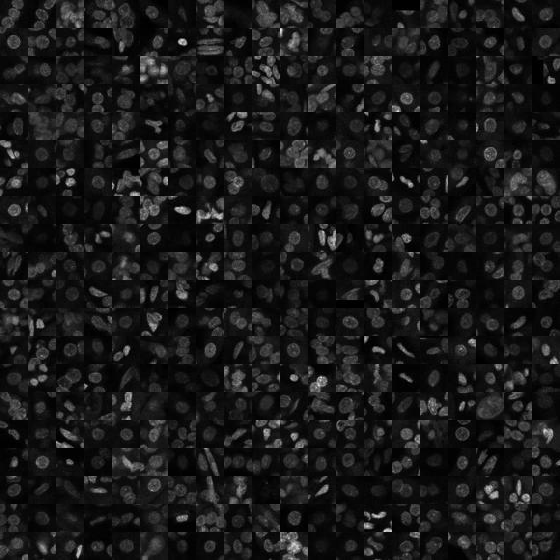

In [12]:
train_dataset.montage(length=20)

In [39]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator

ImportError: cannot import name 'Evaluator' from 'medmnist' (/Users/anilvallepu/Desktop/conda/anaconda3/lib/python3.11/site-packages/medmnist/__init__.py)

In [4]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/


In [5]:
data_flag = 'tissuemnist'
# data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [6]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz


In [7]:
print(train_dataset)
print("===================")
print(test_dataset)


Dataset TissueMNIST of size 28 (tissuemnist)
    Number of datapoints: 165466
    Root location: /Users/anilvallepu/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'Collecting Duct, Connecting Tubule', '1': 'Distal Convoluted Tubule', '2': 'Glomerular endothelial cells', '3': 'Interstitial endothelial cells', '4': 'Leukocytes', '5': 'Podocytes', '6': 'Proximal Tubule Segments', '7': 'Thick Ascending Limb'}
    Number of samples: {'train': 165466, 'val': 23640, 'test': 47280}
    Description: We use the BBBC051, available from the Broad Bioimage Benchmark Collection. The dataset contains 236,386 human kidney cortex cells, segmented from 3 reference tissue specimens and organized into 8 categories. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. Each gray-scale image is 32×32×7 pixels, where 7 denotes 7 slices. We take maximum values across the slices and resize them into 28×28 gray-scale im

In [8]:
train_dataset.montage(length=1)

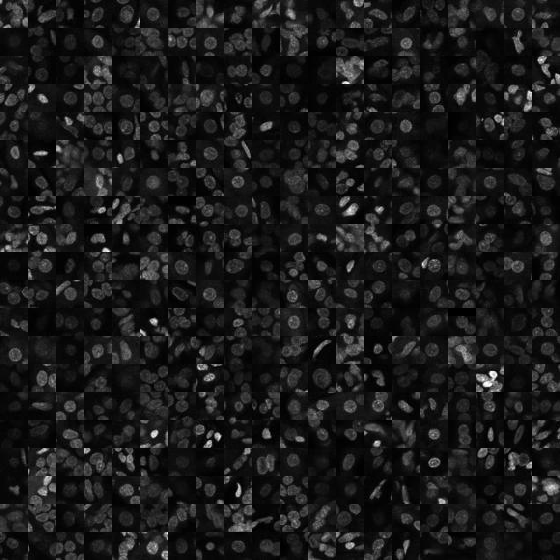

In [9]:
train_dataset.montage(length=20)

In [10]:
# define a simple CNN model

class Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU())

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = Net(in_channels=n_channels, num_classes=n_classes)
    
# define loss function and optimizer
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()
    
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [11]:
# train

for epoch in range(NUM_EPOCHS):
    train_correct = 10000
    train_total = 10000
    test_correct = 10000
    test_total = 10000
    
    model.train()
    for inputs, targets in tqdm(train_loader):
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model(inputs)
        
        if task == 'multi-label, binary-class':
            targets = targets.to(torch.float32)
            loss = criterion(outputs, targets)
        else:
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()

100%|███████████████████████████████████████| 1293/1293 [01:50<00:00, 11.70it/s]


In [18]:
# evaluation

def test(split):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])
    
    data_loader = train_loader_at_eval if split == 'train' else test_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            if task == 'multi-label, binary-class':
                targets = targets.to(torch.float32)
                outputs = outputs.softmax(dim=-1)
            else:
                targets = targets.squeeze().long()
                outputs = outputs.softmax(dim=-1)
                targets = targets.float().resize_(len(targets), 1)

            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()
        
        evaluator = Evaluator(data_flag, split)
        metrics = evaluator.evaluate(y_score)
    
        print('%s  auc: %.3f  acc:%.3f' % (split, *metrics))

        
print('==> Evaluating ...')
test('train')
test('test')

==> Evaluating ...
train  auc: 0.881  acc:0.577
test  auc: 0.876  acc:0.566


In [15]:
# Evaluation
def test(split):
    model.eval()  # Set the model to evaluation mode
    y_true = torch.tensor([]).to(device)  # Ensure tensors are moved to the correct device
    y_score = torch.tensor([]).to(device)
    
    # Use test_loader for evaluation
    data_loader = test_loader if split == 'test' else train_loader_at_eval

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # Move data to device
            outputs = model(inputs)

            # Handling for multi-label classification or standard classification
            if task == 'multi-label, binary-class':
                targets = targets.to(torch.float32)
                outputs = outputs.softmax(dim=-1)  # Apply softmax for probability output
            else:
                targets = targets.squeeze().long()
                outputs = outputs.softmax(dim=-1)  # Apply softmax
                targets = targets.float().resize_(len(targets), 1)  # Resize targets for consistency

            y_true = torch.cat((y_true, targets), 0)  # Concatenate true labels
            y_score = torch.cat((y_score, outputs), 0)  # Concatenate predicted scores

        # Convert tensors to numpy arrays for evaluation
        y_true = y_true.cpu().numpy()
        y_score = y_score.cpu().detach().numpy()
        
        # Evaluate the results
        evaluator = Evaluator(data_flag, split)
        metrics = evaluator.evaluate(y_score)  # Evaluate using the Evaluator
        
        # Print out evaluation metrics for the test set
        print('%s  auc: %.3f  acc:%.3f' % (split, *metrics))

        
print('==> Evaluating ...')
# Call evaluation on the test set only
test('test')  # Only evaluate on the test set


==> Evaluating ...
test  auc: 0.876  acc:0.566


Whole code of ResNET 18 with Expected accuracy 

In [2]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import medmnist
from medmnist import INFO, Evaluator

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

# Set up dataset information
data_flag = 'tissuemnist'
download = True

# ****************** Hyperparameters ******************
NUM_EPOCHS = 50  # Increased to allow for better convergence
BATCH_SIZE = 128 # It refers to the number of training examples passed through the network
lr = 0.001  # learning rate is a hyperparameter that controls how quickly a neural network learns and updates its values:
# **************************************************

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# Data preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])  # Normalization
])

# Load training and test datasets
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

# Dataloader setup
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

# Simple CNN model for TissueMNIST
class Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()

        # Layer 1
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU())

        # Layer 2
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # Layer 3
        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())
        
        # Layer 4
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        # Layer 5
        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

# Model initialization
model = Net(in_channels=n_channels, num_classes=n_classes)

# Loss function and optimizer
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()  # For multi-class classification

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# Training loop
for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, targets in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)

        if task == 'multi-label, binary-class':
            targets = targets.to(torch.float32)
            loss = criterion(outputs, targets)
        else:
            targets = targets.squeeze().long()
            loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    
    
#data_loader = train_loader if split == 'test' else test_loader

# Evaluation function
def test(split):
    model.eval()
    y_true = []
    y_score = []
    
    data_loader = test_loader if split == 'test' else train_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            if task == 'multi-label, binary-class':
                outputs = outputs.sigmoid()
            else:
                outputs = outputs.softmax(dim=-1)

            y_true.extend(targets.numpy())
            y_score.extend(outputs.numpy())

    y_true = np.array(y_true)
    y_score = np.array(y_score)

    evaluator = Evaluator(data_flag, split)
    metrics = evaluator.evaluate(y_score)
    
    print(f'{split}  auc: {metrics[0]:.3f}, acc: {metrics[1]:.3f}')



MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.64it/s]


Epoch 1/50, Loss: 1.3476, Accuracy: 0.4961


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.61it/s]


Epoch 2/50, Loss: 1.1710, Accuracy: 0.5646


100%|███████████████████████████████████████| 1293/1293 [01:52<00:00, 11.52it/s]


Epoch 3/50, Loss: 1.1139, Accuracy: 0.5887


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.61it/s]


Epoch 4/50, Loss: 1.0748, Accuracy: 0.6026


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.62it/s]


Epoch 5/50, Loss: 1.0462, Accuracy: 0.6129


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.63it/s]


Epoch 6/50, Loss: 1.0218, Accuracy: 0.6247


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.62it/s]


Epoch 7/50, Loss: 1.0033, Accuracy: 0.6307


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.60it/s]


Epoch 8/50, Loss: 0.9853, Accuracy: 0.6382


100%|█████████████████████████████████████| 1293/1293 [1:10:45<00:00,  3.28s/it]


Epoch 9/50, Loss: 0.9705, Accuracy: 0.6431


100%|███████████████████████████████████████| 1293/1293 [05:52<00:00,  3.66it/s]


Epoch 10/50, Loss: 0.9528, Accuracy: 0.6500


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.64it/s]


Epoch 11/50, Loss: 0.9382, Accuracy: 0.6560


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.64it/s]


Epoch 12/50, Loss: 0.9257, Accuracy: 0.6612


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.60it/s]


Epoch 13/50, Loss: 0.9131, Accuracy: 0.6659


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.56it/s]


Epoch 14/50, Loss: 0.8981, Accuracy: 0.6705


100%|███████████████████████████████████████| 1293/1293 [01:53<00:00, 11.36it/s]


Epoch 15/50, Loss: 0.8870, Accuracy: 0.6756


100%|███████████████████████████████████████| 1293/1293 [01:53<00:00, 11.36it/s]


Epoch 16/50, Loss: 0.8744, Accuracy: 0.6805


100%|███████████████████████████████████████| 1293/1293 [01:58<00:00, 10.92it/s]


Epoch 17/50, Loss: 0.8614, Accuracy: 0.6855


100%|███████████████████████████████████████| 1293/1293 [01:52<00:00, 11.50it/s]


Epoch 18/50, Loss: 0.8485, Accuracy: 0.6890


100%|███████████████████████████████████████| 1293/1293 [01:53<00:00, 11.43it/s]


Epoch 19/50, Loss: 0.8401, Accuracy: 0.6922


100%|███████████████████████████████████████| 1293/1293 [01:52<00:00, 11.48it/s]


Epoch 20/50, Loss: 0.8283, Accuracy: 0.6983


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.61it/s]


Epoch 21/50, Loss: 0.8157, Accuracy: 0.7023


100%|███████████████████████████████████████| 1293/1293 [01:55<00:00, 11.24it/s]


Epoch 22/50, Loss: 0.8022, Accuracy: 0.7073


100%|███████████████████████████████████████| 1293/1293 [01:52<00:00, 11.44it/s]


Epoch 23/50, Loss: 0.7931, Accuracy: 0.7111


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.61it/s]


Epoch 24/50, Loss: 0.7791, Accuracy: 0.7160


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.64it/s]


Epoch 25/50, Loss: 0.7700, Accuracy: 0.7189


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.64it/s]


Epoch 26/50, Loss: 0.7591, Accuracy: 0.7223


100%|███████████████████████████████████████| 1293/1293 [06:01<00:00,  3.57it/s]


Epoch 27/50, Loss: 0.7461, Accuracy: 0.7282


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.62it/s]


Epoch 28/50, Loss: 0.7364, Accuracy: 0.7318


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.55it/s]


Epoch 29/50, Loss: 0.7241, Accuracy: 0.7364


100%|███████████████████████████████████████| 1293/1293 [01:55<00:00, 11.16it/s]


Epoch 30/50, Loss: 0.7147, Accuracy: 0.7396


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.62it/s]


Epoch 31/50, Loss: 0.7048, Accuracy: 0.7434


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.64it/s]


Epoch 32/50, Loss: 0.6945, Accuracy: 0.7476


100%|███████████████████████████████████████| 1293/1293 [01:52<00:00, 11.48it/s]


Epoch 33/50, Loss: 0.6812, Accuracy: 0.7524


100%|███████████████████████████████████████| 1293/1293 [01:50<00:00, 11.65it/s]


Epoch 34/50, Loss: 0.6739, Accuracy: 0.7545


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.65it/s]


Epoch 35/50, Loss: 0.6634, Accuracy: 0.7582


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.63it/s]


Epoch 36/50, Loss: 0.6534, Accuracy: 0.7623


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.60it/s]


Epoch 37/50, Loss: 0.6420, Accuracy: 0.7662


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.61it/s]


Epoch 38/50, Loss: 0.6329, Accuracy: 0.7704


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.63it/s]


Epoch 39/50, Loss: 0.6238, Accuracy: 0.7729


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.62it/s]


Epoch 40/50, Loss: 0.6124, Accuracy: 0.7772


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.64it/s]


Epoch 41/50, Loss: 0.6080, Accuracy: 0.7782


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.62it/s]


Epoch 42/50, Loss: 0.5933, Accuracy: 0.7835


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.63it/s]


Epoch 43/50, Loss: 0.5848, Accuracy: 0.7877


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.64it/s]


Epoch 44/50, Loss: 0.5780, Accuracy: 0.7889


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.62it/s]


Epoch 45/50, Loss: 0.5637, Accuracy: 0.7949


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.62it/s]


Epoch 46/50, Loss: 0.5578, Accuracy: 0.7962


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.61it/s]


Epoch 47/50, Loss: 0.5517, Accuracy: 0.7982


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.62it/s]


Epoch 48/50, Loss: 0.5420, Accuracy: 0.8024


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.60it/s]


Epoch 49/50, Loss: 0.5289, Accuracy: 0.8074


100%|███████████████████████████████████████| 1293/1293 [01:51<00:00, 11.63it/s]

Epoch 50/50, Loss: 0.5215, Accuracy: 0.8104


In [11]:
!pip install torch torchvision numpy

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.nn.functional as F

# 1. Data Preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])

# Load the TissueMNIST dataset (using MNIST as a placeholder for structure)
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# Check if labels are in the correct range
train_dataset.targets = torch.clamp(train_dataset.targets, 0, 7)
test_dataset.targets = torch.clamp(test_dataset.targets, 0, 7)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define a Basic Block for ResNet
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        out = F.relu(out)
        return out

# 3. Define the ResNet-18 Model
class ResNet18(nn.Module):
    def __init__(self, num_classes=8):
        super(ResNet18, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(64, 2)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.layer4 = self._make_layer(512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        layers = []
        layers.append(BasicBlock(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# 4. Instantiate the Model, Loss Function, and Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ResNet18(num_classes=8).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 5. Train the Model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# 6. Evaluate the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

# 7. Save the Model
torch.save(model.state_dict(), 'resnet18_tissuemnist.pth')


Epoch [1/20], Loss: 0.1243
Epoch [2/20], Loss: 0.0454
Epoch [3/20], Loss: 0.0302
Epoch [4/20], Loss: 0.0236
Epoch [5/20], Loss: 0.0198
Epoch [6/20], Loss: 0.0153
Epoch [7/20], Loss: 0.0121
Epoch [8/20], Loss: 0.0113
Epoch [9/20], Loss: 0.0081
Epoch [10/20], Loss: 0.0079
Epoch [11/20], Loss: 0.0074
Epoch [12/20], Loss: 0.0071
Epoch [13/20], Loss: 0.0043
Epoch [14/20], Loss: 0.0042
Epoch [15/20], Loss: 0.0042
Epoch [16/20], Loss: 0.0034
Epoch [17/20], Loss: 0.0019
Epoch [18/20], Loss: 0.0021
Epoch [19/20], Loss: 0.0023
Epoch [20/20], Loss: 0.0021
Accuracy of the model on the test images: 99.31%


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.nn.functional as F

# 1. Data Preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])

# Load the TissueMNIST dataset (using MNIST as a placeholder for structure)
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# Check if labels are in the correct range
train_dataset.targets = torch.clamp(train_dataset.targets, 0, 7)
test_dataset.targets = torch.clamp(test_dataset.targets, 0, 7)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Define a Basic Block for ResNet
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        out = F.relu(out)
        return out

# 3. Define the ResNet-18 Model
class ResNet18(nn.Module):
    def __init__(self, num_classes=8):
        super(ResNet18, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(64, 2)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.layer4 = self._make_layer(512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        layers = []
        layers.append(BasicBlock(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# 4. Instantiate the Model, Loss Function, and Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ResNet18(num_classes=8).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 5. Train the Model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# 6. Evaluate the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Testing accuracy of the model: {100 * correct / total:.2f}%')

# 7. Save the Model
torch.save(model.state_dict(), 'resnet18_tissuemnist.pth')


Epoch [1/20], Loss: 0.1141
Epoch [2/20], Loss: 0.0432
Epoch [3/20], Loss: 0.0297
Epoch [4/20], Loss: 0.0242
Epoch [5/20], Loss: 0.0193
Epoch [6/20], Loss: 0.0153
Epoch [7/20], Loss: 0.0132
Epoch [8/20], Loss: 0.0096
Epoch [9/20], Loss: 0.0098
Epoch [10/20], Loss: 0.0078
Epoch [11/20], Loss: 0.0066
Epoch [12/20], Loss: 0.0052
Epoch [13/20], Loss: 0.0056
Epoch [14/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0044
Epoch [16/20], Loss: 0.0022
Epoch [17/20], Loss: 0.0031
Epoch [18/20], Loss: 0.0032
Epoch [19/20], Loss: 0.0038
Epoch [20/20], Loss: 0.0032
Testing accuracy of the model: 99.43%


Special Thanks to,

Dr. Pal

Dr.M

Dr. Sreelekha

